# Choose a Data Set
Pick one of the following data sets to analyze for your final project. 
- [Cosmetics](https://drive.google.com/drive/folders/1qvmRfGb7a_pYAtgW6614gxlP-bxl_Ptz?usp=drive_link)
- [Mental Health](https://drive.google.com/drive/folders/1YOp1aQVcmqlAkUEGHNPl_TyNXbY-xHwO?usp=drive_link)
- [Pokemon](https://drive.google.com/drive/folders/1kDu2oRgm_hUW5hdM0tHnMUqCGSKUYT1v?usp=drive_link)
- [Ramen](https://drive.google.com/drive/folders/1Y4_5QHOCy8rHc5EsEwDUuoCfp2WLo-MN?usp=drive_link)
- [Student Performance](https://drive.google.com/drive/folders/1fE31Ka38AnGpgfI_Es3z4psuA0phhH0Y?usp=drive_link)

# My Question

How does the amount of physical activity influence mental health and the various factors that affect it?

# My Analysis

In [24]:
# Analysis Techniques Used: Bar Charts, Histogram, Mean (Average)

# Libraries
import pandas as pd
import seaborn as sb
import numpy as np

df = pd.read_csv('mentalhealth.csv')

# Data Processing
#df['Physical_Activity_Hours'] = np.ceil(df['Physical_Activity_Hours'])
df['Stress_Level'] = df['Stress_Level'].replace(['Low', 'Medium', 'High'], [1,2,3])

inactive = df[(df['Physical_Activity_Hours'] >= 0) & (df['Physical_Activity_Hours'] <=3)]
active = df[(df['Physical_Activity_Hours'] > 3) & (df['Physical_Activity_Hours'] <= 6)]
very_active = df[(df['Physical_Activity_Hours'] > 6)]


C:\Users\Zach\AppData\Local\Temp\ipykernel_13288\2149547137.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress_Level'] = df['Stress_Level'].replace(['Low', 'Medium', 'High'], [1,2,3])


In [5]:
pa_mhCont = pd.DataFrame({ # Excellent, Good, Fair, Poor
    "Semi-Active (0-3 hrs)": [len(inactive[(inactive['Mental_Health_Status'] == "Excellent")]), 
                              len(inactive[(inactive['Mental_Health_Status'] == "Good")]), 
                              len(inactive[(inactive['Mental_Health_Status'] == "Fair")]),
                              len(inactive[(inactive['Mental_Health_Status'] == "Poor")]),
                             (len(inactive[(inactive['Mental_Health_Status'] == "Excellent") | (inactive['Mental_Health_Status'] == "Good")]) / len(inactive)) * 100,
                             (len(inactive[(inactive['Mental_Health_Status'] == "Fair") | (inactive['Mental_Health_Status'] == "Poor")]) / len(inactive)) * 100],
    "Active (4-6 hrs)": [len(active[(active['Mental_Health_Status'] == "Excellent")]),
                    len(active[(active['Mental_Health_Status'] == "Good")]),
                    len(active[(active['Mental_Health_Status'] == "Fair")]),
                    len(active[(active['Mental_Health_Status'] == "Poor")]),
                    (len(active[(active['Mental_Health_Status'] == "Excellent") | (active['Mental_Health_Status'] == "Good")]) / len(active)) * 100,
                    (len(active[(active['Mental_Health_Status'] == "Fair") | (active['Mental_Health_Status'] == "Poor")]) / len(active)) * 100],
    "Very Active (7-10 hrs)": [len(very_active[(very_active['Mental_Health_Status'] == "Excellent")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Good")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Fair")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Poor")]),
                    (len(very_active[(very_active['Mental_Health_Status'] == "Excellent") | (very_active['Mental_Health_Status'] == "Good")]) / len(very_active)) * 100,
                    (len(very_active[(very_active['Mental_Health_Status'] == "Fair") | (very_active['Mental_Health_Status'] == "Poor")]) / len(very_active)) * 100],

})
pa_mhCont.index=['Excellent (Mental Health)', 'Good', 'Fair', 'Poor', "Good Mental Health (%) (Excellent-Good)", "Poor Mental Health (%) (Fair-Poor)"]

pa_s = pd.DataFrame({
    'Activity Level': ['Semi-Active (0-3 hrs)', 'Active (4-6 hrs)', 'Very Active (7-10 hrs)'],
    'Mean Sleep Hours': [inactive['Sleep_Hours'].mean(), active['Sleep_Hours'].mean(), very_active['Sleep_Hours'].mean()]
})

pa_mhCont

,Semi-Active (0-3 hrs),Active (4-6 hrs),Very Active (7-10 hrs)
Excellent (Mental Health),730.000000,751.000000,1037.000000
Good,756.000000,786.000000,966.000000
Fair,783.000000,708.000000,999.000000
Poor,756.000000,731.000000,997.000000
Good Mental Health (%) (Excellent-Good),49.123967,51.646505,50.087522
Poor Mental Health (%) (Fair-Poor),50.876033,48.353495,49.912478


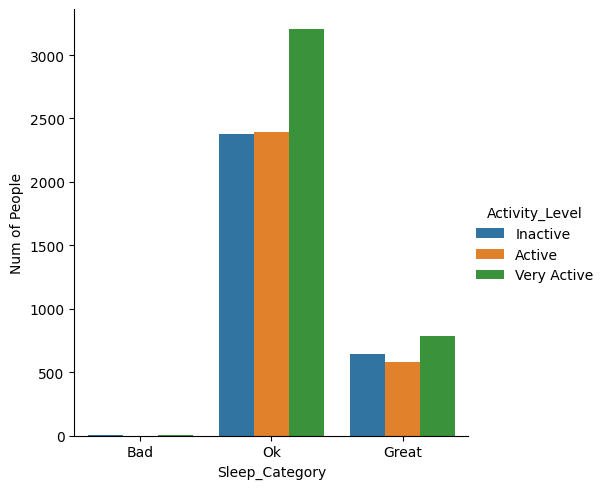

In [17]:
data = {
    'Sleep_Category': ['Bad', 'Bad', 'Bad', 'Ok', 'Ok', 'Ok', 'Great', 'Great', 'Great'],
    'Activity_Level': ['Inactive', 'Active', 'Very Active', 'Inactive', 'Active', 'Very Active', 'Inactive', 'Active', 'Very Active'],
    'Num of People': [
        len(inactive[inactive['Sleep_Hours'] <= 4]),
        len(active[active['Sleep_Hours'] <= 4]),
        len(very_active[very_active['Sleep_Hours'] <= 4]),
        len(inactive[(inactive['Sleep_Hours'] > 4) & (inactive['Sleep_Hours'] <= 8)]),
        len(active[(active['Sleep_Hours'] > 4) & (active['Sleep_Hours'] <= 8)]),
        len(very_active[(very_active['Sleep_Hours'] > 4) & (very_active['Sleep_Hours'] <= 8)]),
        len(inactive[inactive['Sleep_Hours'] > 8]),
        len(active[active['Sleep_Hours'] > 8]),
        len(very_active[very_active['Sleep_Hours'] > 8])
    ]
}



dfs = pd.DataFrame(data)

sb.catplot(
    data=dfs,
    x='Sleep_Category',
    y='Num of People',
    hue='Activity_Level',
    kind='bar'
)

In [39]:
# Process Data
print("The stress level is from 1-3, 1 being low stress, 3 being high stress")
print("The average (mean) stress level of those physically inactive (0-3 hours per week) is", inactive['Stress_Level'].mean())
print("The average (mean) stress level of those physically active (3-6 hours per week) is",active['Stress_Level'].mean())
print("The average (mean) stress level of those very physically inactive (>6 hours per week) is",very_active['Stress_Level'].mean())

The stress level is from 1-3, 1 being low stress, 3 being high stress
The average (mean) stress level of those physically inactive (0-3 hours per week) is 1.9867768595041322
The average (mean) stress level of those physically active (3-6 hours per week) is 1.9855510752688172
The average (mean) stress level of those very physically inactive (>6 hours per week) is 2.0202550637659416


# My Answer

There is no direct or noticeable correlation between physical activity and mental health, as both good and bad mental health are relatively consistent in making up half of their respective samples (semi-active, active, and very active). Physical activity and stress levels also show no correlation, as the average stress level for each level of physical activity (semi-active, active, and very active) is consistent with level 2 stress (medium stress).

However, greater amounts of physical activity (3-10 hours per week) are shown to increase the average hours of sleep over a week compared to less than 3 hours per week, which can improve mental health.